
# What is One-Hot Encoding?
One-hot encoding is a method used in machine learning to convert categorical data (like labels or categories) into a numerical format that can be used in mathematical models. It transforms each unique category into a binary vector.

# Why is One-Hot Encoding Needed?
Most machine learning algorithms cannot directly work with categorical data because they operate on numerical data. If you provide raw categorical labels (like "cat," "dog," "bird") to the algorithm, it won't understand them. One-hot encoding resolves this by representing categories in a machine-readable format.

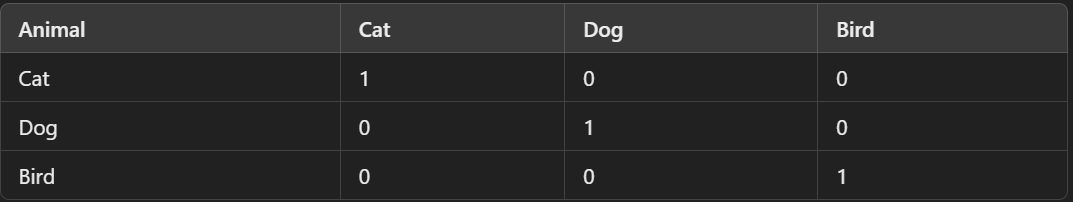

They are also called Dummy variables

In [26]:
import pandas as pd

df = pd.read_csv('homeprices.csv')
df.head()

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000


In [27]:
df.town.value_counts()

town
monroe township    5
west windsor       4
robinsville        4
Name: count, dtype: int64

In [28]:
# Now lets create those dummy variables, for this pandas has a function .get_dummies() # here we used astype(int) to get 0 1 values
dummies = pd.get_dummies(df.town).astype(int)
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


Now we have two dataframes so now we need to merge both of these so we have a pandas function for this which is pd.concat([df1,df2],axis='columns or rows')

In [29]:
merged = pd.concat([df,dummies.astype(int)],axis='columns')
print(merged)

               town  area   price  monroe township  robinsville  west windsor
0   monroe township  2600  550000                1            0             0
1   monroe township  3000  565000                1            0             0
2   monroe township  3200  610000                1            0             0
3   monroe township  3600  680000                1            0             0
4   monroe township  4000  725000                1            0             0
5      west windsor  2600  585000                0            0             1
6      west windsor  2800  615000                0            0             1
7      west windsor  3300  650000                0            0             1
8      west windsor  3600  710000                0            0             1
9       robinsville  2600  575000                0            1             0
10      robinsville  2900  600000                0            1             0
11      robinsville  3100  620000                0            1 

Now here we're going to dump one of the dummy variables column because it will cause dummy variables trap here we have multi-collinearity
but this won't affect linear regression becasue linear regression will automatically drop the dummy variables but its a good practise and we dropped one because we can have the third by by looking at the 2 remaining columns

In [30]:
final = merged.drop(['town','west windsor'],axis='columns')
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
# Now we need Feature(X) and Label(Y) terms to train the model
# So our features are area monoroe township robinsville and price is our label

X = final.drop('price',axis='columns')
X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [32]:
y = final.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [33]:
model.fit(X,y)

LinearRegression()

In [34]:
# I want to predict the price of a house in robinsville So,
model.predict([[2800,0,1]]) # area monroetownship	robinsville

c:\Users\Nabeel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [35]:
# I want to predict the price of a house in monroetownship So,
model.predict([[2800,1,0]]) # area monroetownship	robinsville

c:\Users\Nabeel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([565089.22812299])

In [36]:
model.predict([[2800,0,0]]) # This is for  west windsor

c:\Users\Nabeel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([605103.20361213])

In [37]:
# If you want to known your model's accuracy you can do this
model.score(X,y)*100 # Here its 95% accurate

95.73929037221872

In [38]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


# 2nd Method

In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dfle = df
dfle.town = le.fit_transform(dfle.town)

In [40]:
df

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [41]:
X = dfle[['town','area']].values
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [42]:
y = dfle.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [43]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ohe = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False), [0])  # Apply OneHotEncoder to column 0
    ], 
    remainder='passthrough'  # Keep other columns unchanged
)

# Fit and transform the data
X = ohe.fit_transform(X)



In [44]:
X = X[:,1:]

In [45]:
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [46]:
model.fit(X,y)


LinearRegression()

In [49]:
model.predict([[1,0,2800]]) # Robinsvile west winsdor area

array([590775.63964739])